In [1]:
import numpy as np
import sys,os
sys.path.append(os.getcwd()[:-11]+'src/')
from models import *
from topological_methods import *
import matplotlib.pyplot as plt

In [202]:
from torchvision import datasets, transforms

transform=transform=transforms.Compose([
        transforms.ToTensor()
        ])

data_train = datasets.FashionMNIST('/Users/kosio/Data/MNIST/',  transform=transform, download=True)


In [203]:
rand_samp = np.random.choice(np.arange(0,60000),size=2000,replace=False)
dat_samples = data_train.data.reshape(len(data_train.data),-1)[rand_samp]
dmat = pairwise_distances(dat_samples)

In [204]:
def intrinsic_dim(dmat,k=3):
    m = np.zeros(len(dmat))
    for i in range(len(dmat)):
        order_dist = np.sort(dmat[i])
        m[i] = (np.sum([np.log(order_dist[k]/order_dist[j]) for j in range(1,k-1)]))
    return ((1/(len(dmat)*(k-1)))*np.sum(m))**-1

In [205]:
ks = [3,5,10,20]
intrinsic_dims = []
for k in ks:
    intrinsic_dims.append(intrinsic_dim(dmat,k=k))

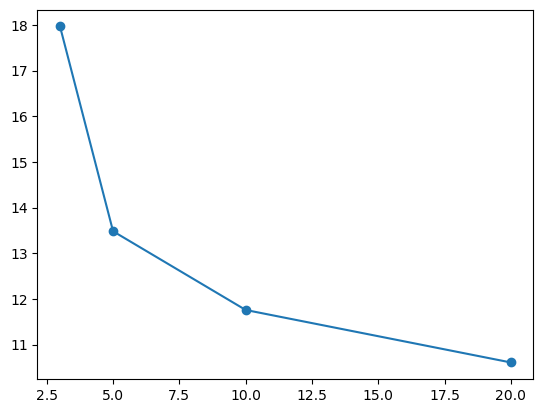

In [206]:
plt.plot(ks,intrinsic_dims,'-o')